In [53]:
import pandas  as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import jieba




In [54]:
table = pd.read_csv("WeiboCrawler/user.csv")
table=table[['content','created_at','like_num','location']]
table.dropna(axis=0, inplace=True)  # 删除包含空值的行
print(table.isna().any())
print(len(table))
table.to_csv('processed.csv', index=False)
with open('comments.txt', 'w') as f:
    for item in table['content']:
        line = ''.join(item) + '\n'
        line.replace(' ','')
        f.write(line)




content       False
created_at    False
like_num      False
location      False
dtype: bool
1156


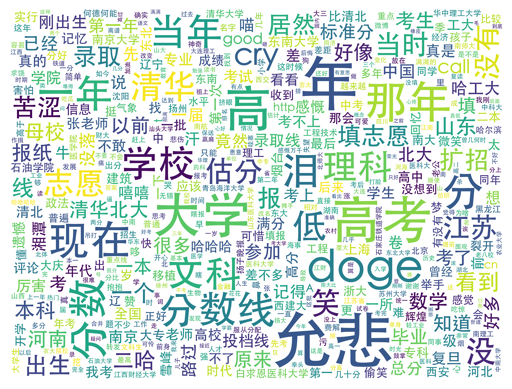

In [55]:
# 生成词云图


# 数据获取
with open("comments.txt",'r')as f:
    text=f.read()

# with open('dream is possible.txt','r',encoding='gbk')as f:
#     text=f.read()
#图片获取
# mask=np.array(Image.open("C:\heart.png"))


f_stop=open('stop.txt')
# 将stopwords_path文件打开
f_stop_text=f_stop.read()
# 将文件内容读到f_stop_text
f_stop.close()
#创建mywordlist空列表
f_stop_seg_list=f_stop_text.split('\n')


font='STHeiti Medium.ttc'
sep_list=jieba.cut(text)
sep_list=" ".join(sep_list)
wc=WordCloud(
    scale=4,#调整图片大小---（如果设置太小图会很模糊）
    font_path=font,#使用的字体库
    max_words=500,  # 词云显示的最大词数
    background_color='white', #背景颜色
    max_font_size=200,
    # min_font_size=1,
    stopwords=f_stop_seg_list, #屏蔽的内容
    collocations=False, #避免重复单词
    width=1600,height=1200 #图像宽高，字间距
)

wc.generate(sep_list) #制作词云
wc.to_file('词云.jpg') #保存到当地文件

# 图片展示
plt.figure(dpi=100) #通过这里可以放大或缩小
plt.imshow(wc,interpolation='catrom')
plt.axis('off')
plt.show()

['2023-05-30' '2023-05-31' '2023-06-01' '2023-06-02' '2023-06-03'
 '2023-06-04' '2023-06-05' '2023-06-06' '2023-06-07' '2023-06-08'
 '2023-06-09']


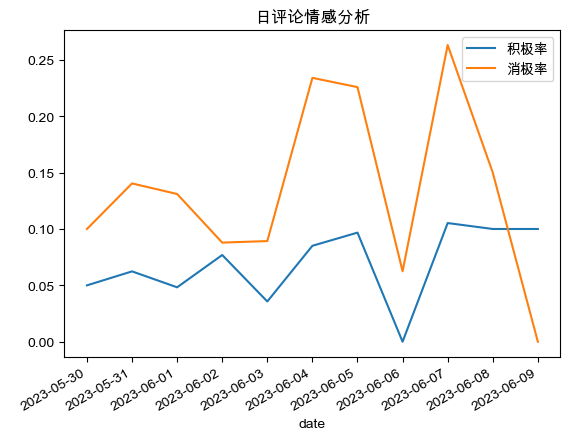

In [56]:
data = pd.read_csv("final_data.csv")
data['location'] = data['location'].str[2:]
# 列出列'A'的所有不重复的值
dates = data['created_at'].unique()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
dates  = dates[::-1]
print(dates)

def get_e_value(date,df):

    c=0#正向
    d=0#负向
    e=0#中性
    result = df[df['created_at'] == date]
    for i in result.emotion:
        if i == '中性':
            e += 1
        elif i == '积极':
            c += 1
        else:
            d += 1
    sum = c + d + e#评论总数量
    rate_c=c/sum#正向评论于该天占比
    rate_d=d/sum#负向评论于该天占比
    return rate_c,rate_d

list_c = []
list_d = []
for date in dates:
    c,d = get_e_value(date, data)
    list_c.append(c)
    list_d.append(d)
# 绘制曲线
plt.plot(dates, list_c, label='积极率')
plt.plot(dates, list_d, label='消极率')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('日评论情感分析')
plt.xlabel('date')
plt.ylabel(' ')
plt.gcf().autofmt_xdate()

# 显示图形
plt.show()

In [72]:
#coding='utf-8'


provinces=['湖南','湖北','广东','广西','河南','河北','山东','山西',
                        '江苏','浙江','江西','黑龙江','新疆','云南','香港','澳门',
                        '贵州','福建','吉林','安徽','四川','西藏','宁夏','辽宁',
                        '青海','甘肃','陕西','内蒙古','台湾','北京','上海','天津',
                        '重庆','海南']

sheng = ['湖南','湖北','广东','河南','河北','山东','山西',
                        '江苏','浙江','江西','黑龙江','云南','贵州','福建','吉林','安徽','四川','辽宁','陕西','海南','青海','甘肃'
         ]

shi = ['北京','上海','天津', '重庆']

tb = ['香港','澳门']



length = len(data)


data_locations = data['location'].unique().tolist()


def get_p_value(province,df):

    c=0#正向
    d=0#负向
    e=0#中性
    result = df[df['location'] == province]

    for i in result.emotion:
        if i == '中性':
            e += 1
        elif i == '积极':
            c += 1
        else:
            d += 1
    sum = c + d + e#评论总数量
    rate_c=c/sum * 100
    rate_d=d/sum* 100

    sum = sum / length * 100

    if province in sheng:
        province = province + '省'
    elif province in shi:
        province = province + '市'
    elif province in tb:
        province = province+'特别行政区'
    elif province == '内蒙古':
        province = '内蒙古自治区'
    elif province == '广西':
        province = '广西壮族自治区'
    elif province == '西藏':
        province = '西藏自治区'
    elif province == '宁夏':
        province = '宁夏回族自治区'
    else:
        province = '新疆维吾尔自治区'



    return [province,[rate_c,rate_d,sum]]
    #return [province,rate_c]

province_data = []
province_data_1 = []
province_data_2 = []
province_data_3 = []
for province in provinces:
    if province in data_locations:
        province_data.append(get_p_value(province,data))
        province_data_1.append([province_data[-1][0], province_data[-1][1][0]])
        province_data_2.append([province_data[-1][0], province_data[-1][1][1]])
        province_data_3.append([province_data[-1][0], province_data[-1][1][2]])

print(province_data)

[['湖南省', [0.0, 10.526315789473683, 3.2871972318339098]], ['湖北省', [5.263157894736842, 7.894736842105263, 3.2871972318339098]], ['广东省', [8.108108108108109, 10.81081081081081, 6.401384083044983]], ['广西壮族自治区', [0.0, 7.6923076923076925, 1.124567474048443]], ['河南省', [4.878048780487805, 17.073170731707318, 3.5467128027681665]], ['河北省', [5.88235294117647, 7.8431372549019605, 4.411764705882353]], ['山东省', [4.705882352941177, 15.294117647058824, 7.352941176470589]], ['山西省', [5.88235294117647, 29.411764705882355, 1.4705882352941175]], ['江苏省', [6.770833333333333, 10.416666666666668, 16.608996539792386]], ['浙江省', [3.4482758620689653, 6.896551724137931, 5.017301038062284]], ['江西省', [5.555555555555555, 27.77777777777778, 1.5570934256055362]], ['黑龙江省', [0.0, 13.043478260869565, 1.9896193771626298]], ['新疆维吾尔自治区', [16.666666666666664, 16.666666666666664, 0.5190311418685121]], ['云南省', [0.0, 28.57142857142857, 0.6055363321799307]], ['贵州省', [11.11111111111111, 11.11111111111111, 0.7785467128027681]], ['福建省'

In [73]:
#coding='utf-8'
from pyecharts.charts import Map,Geo
from pyecharts import options as opts





# 创建地图图表
map_chart = (
    Map()
    .add("正向评论百分比", province_data_1, maptype="china")
    .add("负向评论百分比", province_data_2, maptype="china")
    .add("评论百分比", province_data_3, maptype="china")

    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="省份正负向评论百分比"),
        visualmap_opts=opts.VisualMapOpts(range_color=["#FF7F50", "#87CEFA"]),
    )
)

# 生成HTML文件
map_chart.render("map_chart.html")



'/Users/wanghanlin/some_programe/weibo_lstm/map_chart.html'